In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [3]:
file_path = "../data/lulesh_summary.csv"

df = pd.read_csv(
    file_path,
    delimiter=",",
    encoding="utf-8",
    header=0
)

In [4]:
df.head()

,nodes,taskspernode,threadspertask,s,cpufreq,slurm_job_id,cnt,tpe,tlb,tce,tse,tte,tmpe,tmlb,tmce,tmse,tmte,tope,tolb,toce,tose,tote,epe,elb,ece,ese,ete,empe,emlb,emce,emse,emte,eope,eolb,eoce,eose,eote,total_time
0,1,1,96,1,1000000,60734053,1.0,0.416,0.921,0.452,0.513,0.880,0.893,1.0,0.893,1.0,0.893,0.466,0.921,0.506,0.513,0.986,0.011,1.364,0.008,0.623,0.014,0.122,1.0,0.122,1.0,0.122,0.095,1.364,0.069,0.623,0.111,17.285
1,1,1,96,1,1500000,60734054,1.0,0.417,0.906,0.460,0.525,0.878,0.890,1.0,0.890,1.0,0.890,0.469,0.906,0.517,0.525,0.986,0.013,2.270,0.006,0.413,0.013,0.125,1.0,0.125,1.0,0.125,0.100,2.270,0.044,0.413,0.107,13.248
2,1,1,96,1,2000000,60734055,1.0,0.398,0.923,0.432,0.475,0.909,0.932,1.0,0.932,1.0,0.932,0.427,0.923,0.463,0.475,0.975,0.095,1.061,0.090,5.510,0.016,0.247,1.0,0.247,1.0,0.247,0.386,1.061,0.363,5.510,0.066,16.606
3,1,1,96,1,2500000,60734056,1.0,0.385,0.942,0.409,0.509,0.803,0.812,1.0,0.812,1.0,0.812,0.474,0.942,0.503,0.509,0.989,0.011,0.883,0.013,0.912,0.014,0.085,1.0,0.085,1.0,0.085,0.131,0.883,0.148,0.912,0.163,7.575
4,1,1,96,1,3000000,60734057,1.0,0.380,0.924,0.411,0.520,0.791,0.800,1.0,0.800,1.0,0.800,0.475,0.924,0.514,0.520,0.990,0.012,1.733,0.007,0.434,0.016,0.101,1.0,0.101,1.0,0.101,0.122,1.733,0.071,0.434,0.163,7.106


In [5]:
df.shape

(112, 38)

In [6]:
df_without_overflow = df[df["total_time"] < 19*60 + 50]  # 19min 50sec
df_without_overflow.head()

,nodes,taskspernode,threadspertask,s,cpufreq,slurm_job_id,cnt,tpe,tlb,tce,tse,tte,tmpe,tmlb,tmce,tmse,tmte,tope,tolb,toce,tose,tote,epe,elb,ece,ese,ete,empe,emlb,emce,emse,emte,eope,eolb,eoce,eose,eote,total_time
0,1,1,96,1,1000000,60734053,1.0,0.416,0.921,0.452,0.513,0.880,0.893,1.0,0.893,1.0,0.893,0.466,0.921,0.506,0.513,0.986,0.011,1.364,0.008,0.623,0.014,0.122,1.0,0.122,1.0,0.122,0.095,1.364,0.069,0.623,0.111,17.285
1,1,1,96,1,1500000,60734054,1.0,0.417,0.906,0.460,0.525,0.878,0.890,1.0,0.890,1.0,0.890,0.469,0.906,0.517,0.525,0.986,0.013,2.270,0.006,0.413,0.013,0.125,1.0,0.125,1.0,0.125,0.100,2.270,0.044,0.413,0.107,13.248
2,1,1,96,1,2000000,60734055,1.0,0.398,0.923,0.432,0.475,0.909,0.932,1.0,0.932,1.0,0.932,0.427,0.923,0.463,0.475,0.975,0.095,1.061,0.090,5.510,0.016,0.247,1.0,0.247,1.0,0.247,0.386,1.061,0.363,5.510,0.066,16.606
3,1,1,96,1,2500000,60734056,1.0,0.385,0.942,0.409,0.509,0.803,0.812,1.0,0.812,1.0,0.812,0.474,0.942,0.503,0.509,0.989,0.011,0.883,0.013,0.912,0.014,0.085,1.0,0.085,1.0,0.085,0.131,0.883,0.148,0.912,0.163,7.575
4,1,1,96,1,3000000,60734057,1.0,0.380,0.924,0.411,0.520,0.791,0.800,1.0,0.800,1.0,0.800,0.475,0.924,0.514,0.520,0.990,0.012,1.733,0.007,0.434,0.016,0.101,1.0,0.101,1.0,0.101,0.122,1.733,0.071,0.434,0.163,7.106


In [7]:
df_without_overflow.shape

(99, 38)

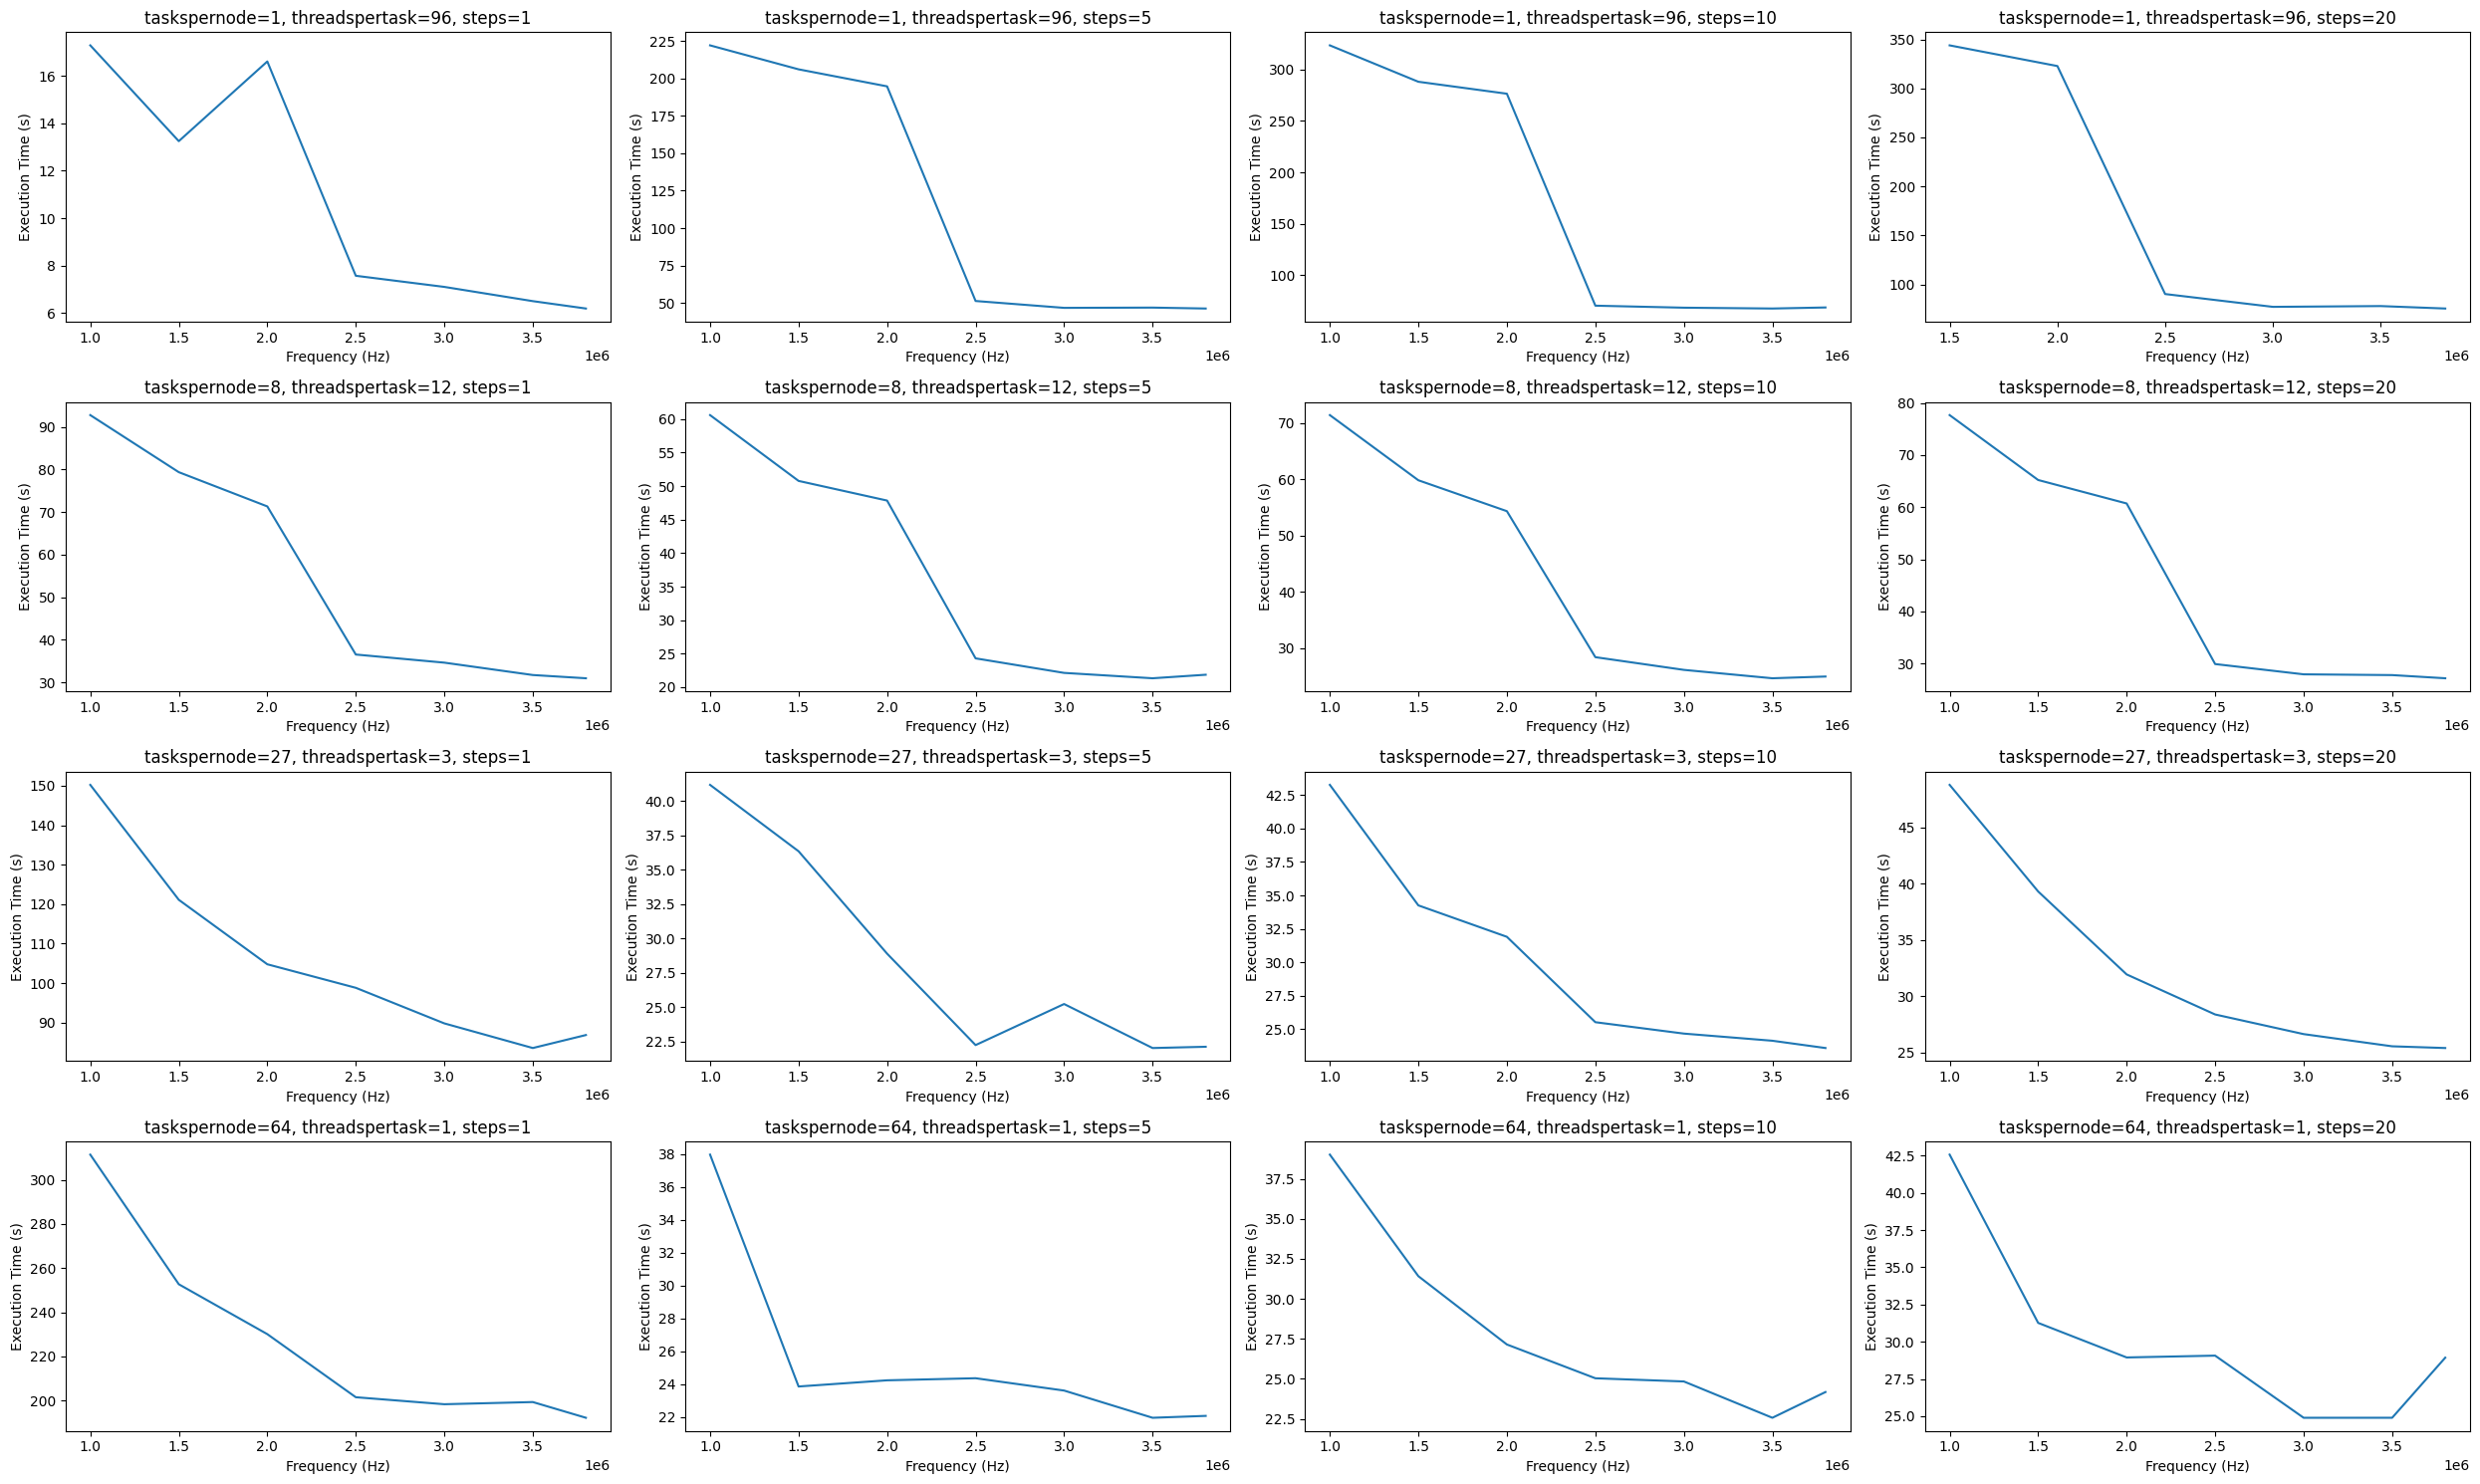

In [8]:
fig, axs = plt.subplots(4, 4, figsize=(25, 15))
first_step_runtime = None

for i, task in enumerate(df["taskspernode"].unique()):
    for j, step in enumerate(df["s"].unique()):
        subset_df = df[(df["taskspernode"] == task) & (df["s"] == step)]
        if step == 1:
            first_step_runtime = subset_df['total_time']
            axs[i, j].plot(subset_df['cpufreq'], subset_df['total_time'])
            axs[i, j].set_title(f'taskspernode={task}, threadspertask={96//task}, steps={step}')
            axs[i, j].set_xlabel('Frequency (Hz)')
            axs[i, j].set_ylabel('Execution Time (s)')
        else:
            if len(subset_df['total_time']) != len(first_step_runtime.values):
                continue
            axs[i, j].plot(subset_df['cpufreq'], (subset_df['total_time'] - first_step_runtime.values) / (step - 1))
            axs[i, j].set_title(f'taskspernode={task}, threadspertask={96//task}, steps={step}')
            axs[i, j].set_xlabel('Frequency (Hz)')
            axs[i, j].set_ylabel('Execution Time (s)')

plt.tight_layout()

plt.savefig("../results/lulesh_cpufreq_total_time.png", dpi=300)
plt.show()

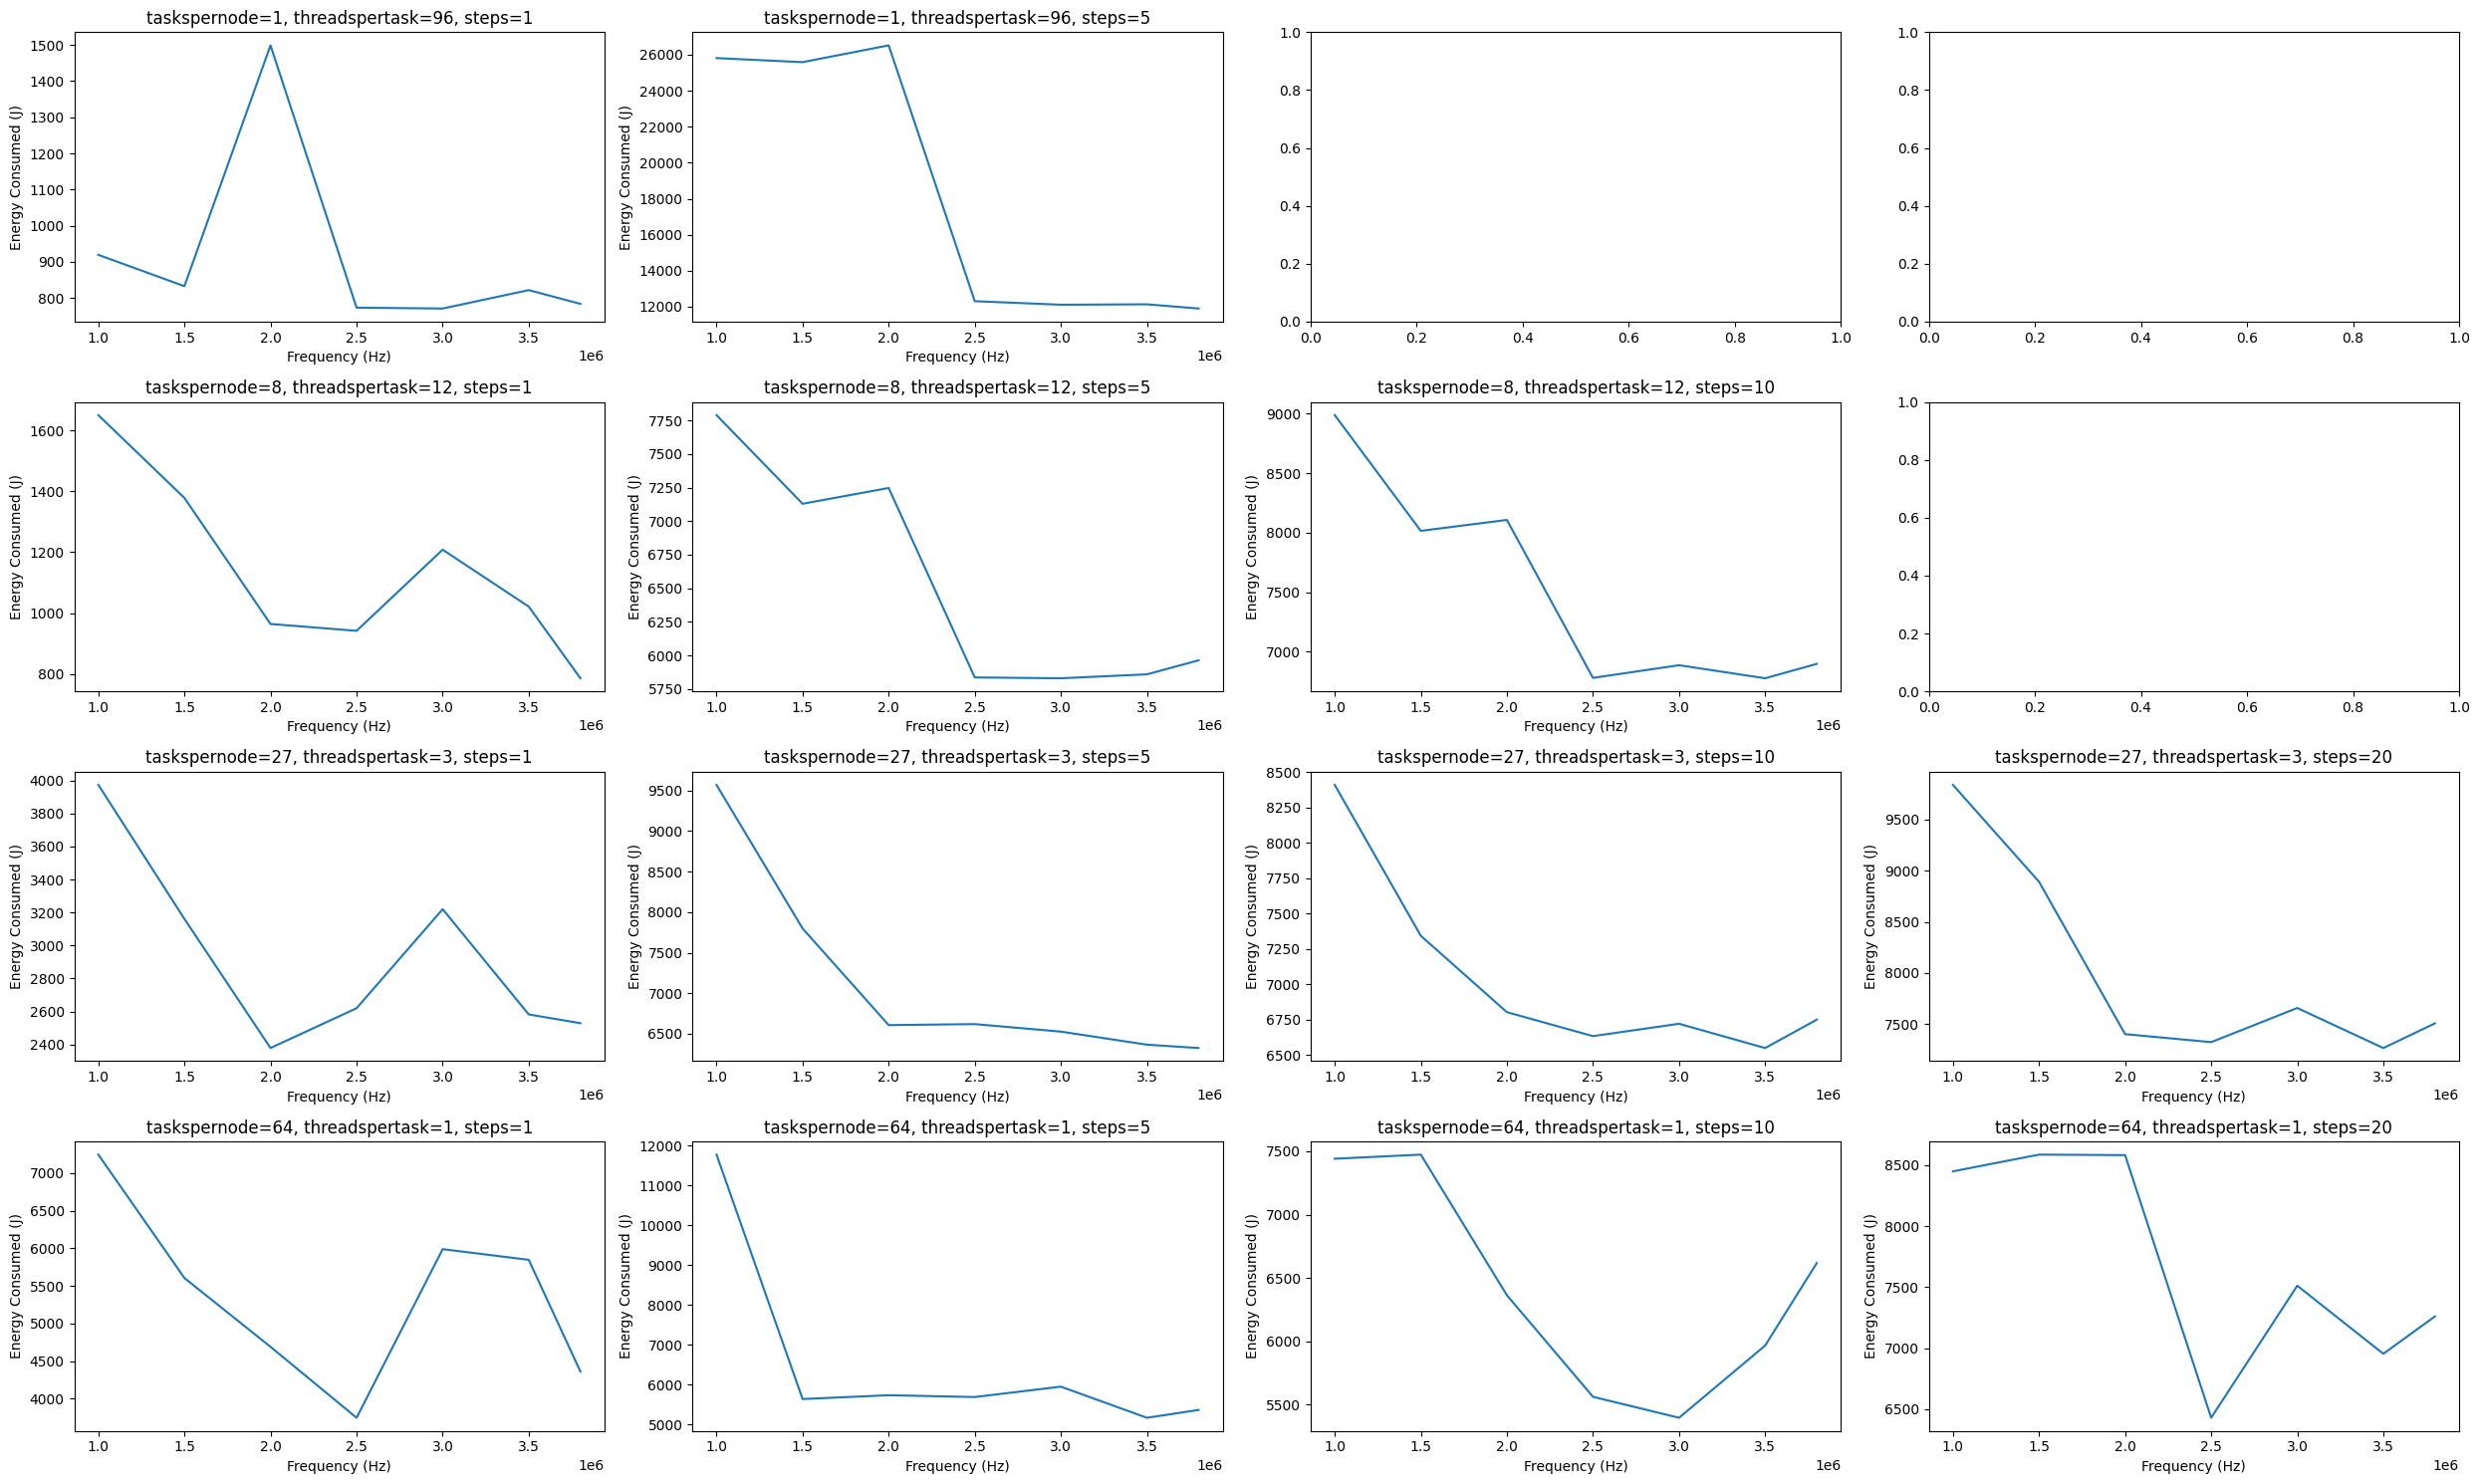

In [9]:
fig, axs = plt.subplots(4, 4, figsize=(25, 15))
first_step_energy = None

for i, task in enumerate(df_without_overflow["taskspernode"].unique()):
    for j, step in enumerate(df["s"].unique()):
        subset_df = df_without_overflow[(df_without_overflow["taskspernode"] == task) & (df_without_overflow["s"] == step)]

        total_energy_list = []
        for freq in subset_df["cpufreq"].unique():
            single_run_df = pd.read_csv(
                f"../data/lulesh_reports/{task}_ranks_{96 // task}_threads_{freq}_hz_{step}_steps.csv",
                delimiter=",",
                encoding="utf-8",
                header=0
            )

            total_energy_list.append(single_run_df["total_energy"].max())

        if step == 1:
            first_step_energy = total_energy_list
            axs[i, j].plot(subset_df['cpufreq'], total_energy_list)
            axs[i, j].set_title(f'taskspernode={task}, threadspertask={96//task}, steps={step}')
            axs[i, j].set_xlabel('Frequency (Hz)')
            axs[i, j].set_ylabel('Energy Consumed (J)')
        else:
            if len(total_energy_list) != len(first_step_energy):
                continue
            total_energy_list = np.array(total_energy_list)
            first_step_energy = np.array(first_step_energy)
            axs[i, j].plot(subset_df['cpufreq'], (total_energy_list - first_step_energy) / (step - 1))
            axs[i, j].set_title(f'taskspernode={task}, threadspertask={96//task}, steps={step}')
            axs[i, j].set_xlabel('Frequency (Hz)')
            axs[i, j].set_ylabel('Energy Consumed (J)')

plt.tight_layout()

plt.savefig("../results/lulesh_cpufreq_total_energy.png", dpi=300)
plt.show()

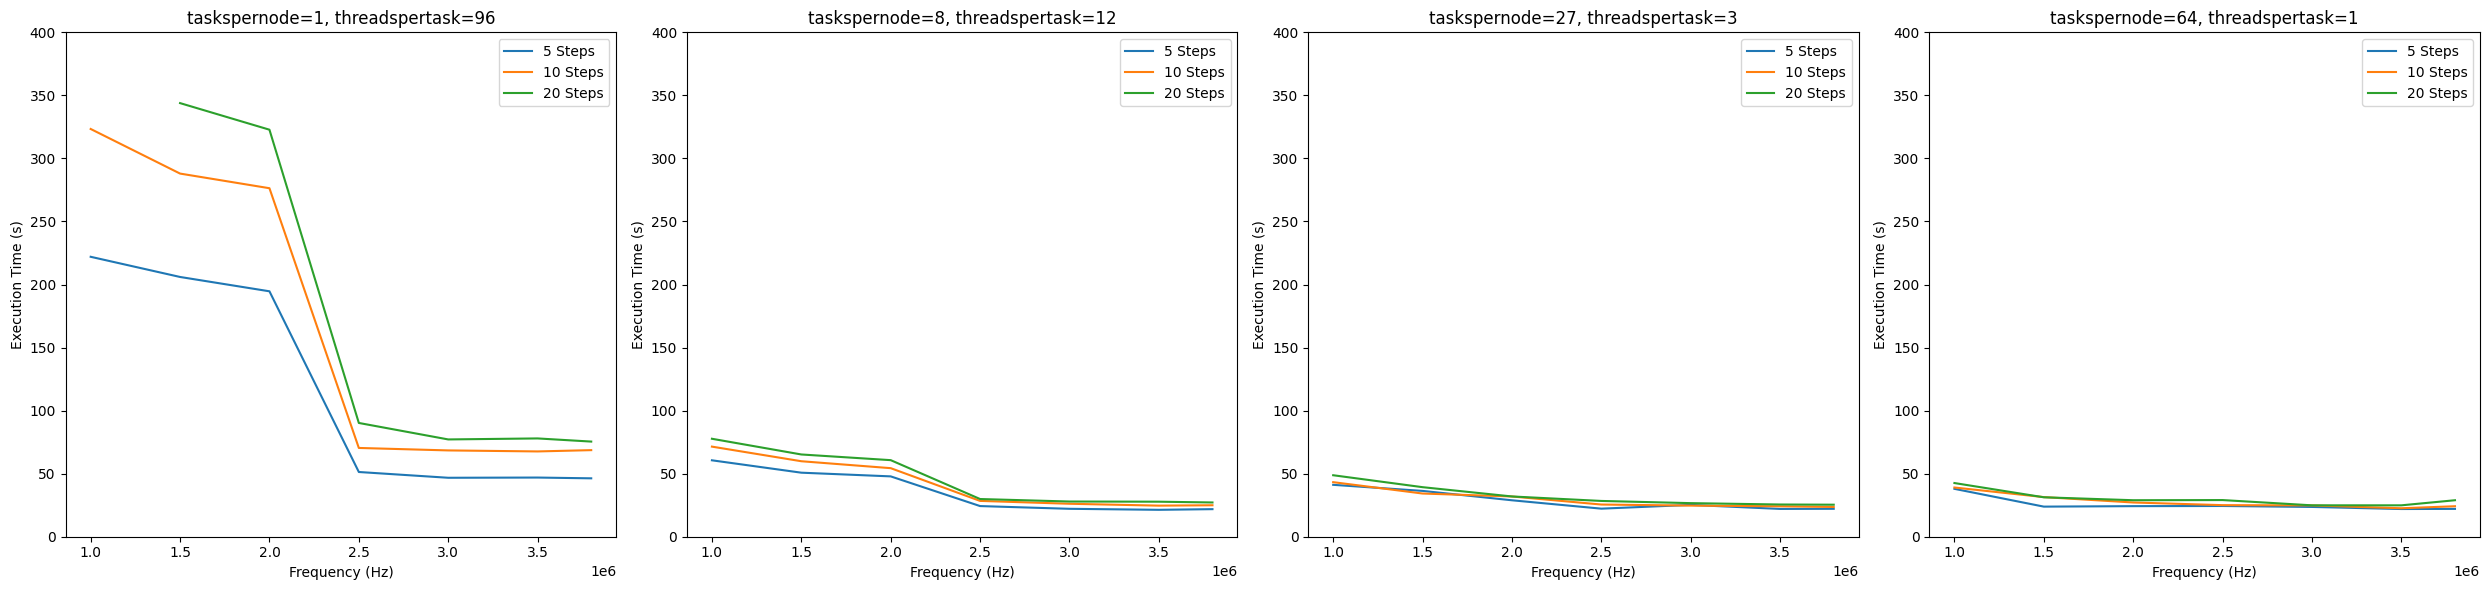

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(25, 6))
first_step_runtime = None

for i, task in enumerate(df["taskspernode"].unique()):
    for j, step in enumerate(df["s"].unique()):
        subset_df = df[(df["taskspernode"] == task) & (df["s"] == step)]
        if step == 1:
            first_step_runtime = subset_df['total_time']
        else:
            if len(subset_df['total_time']) != len(first_step_runtime.values):
                continue
            axs[i%4].plot(subset_df['cpufreq'], (subset_df['total_time'] - first_step_runtime.values) / (step - 1), label=f"{step} Steps")
            axs[i%4].set_title(f'taskspernode={task}, threadspertask={96//task}')
            axs[i%4].set_xlabel('Frequency (Hz)')
            axs[i%4].set_ylabel('Execution Time (s)')
            axs[i%4].legend()
            axs[i%4].set_ylim([0, 400])

plt.tight_layout()

plt.savefig("../results/lulesh_cpufreq_total_time_compact.png", dpi=300)
plt.show()

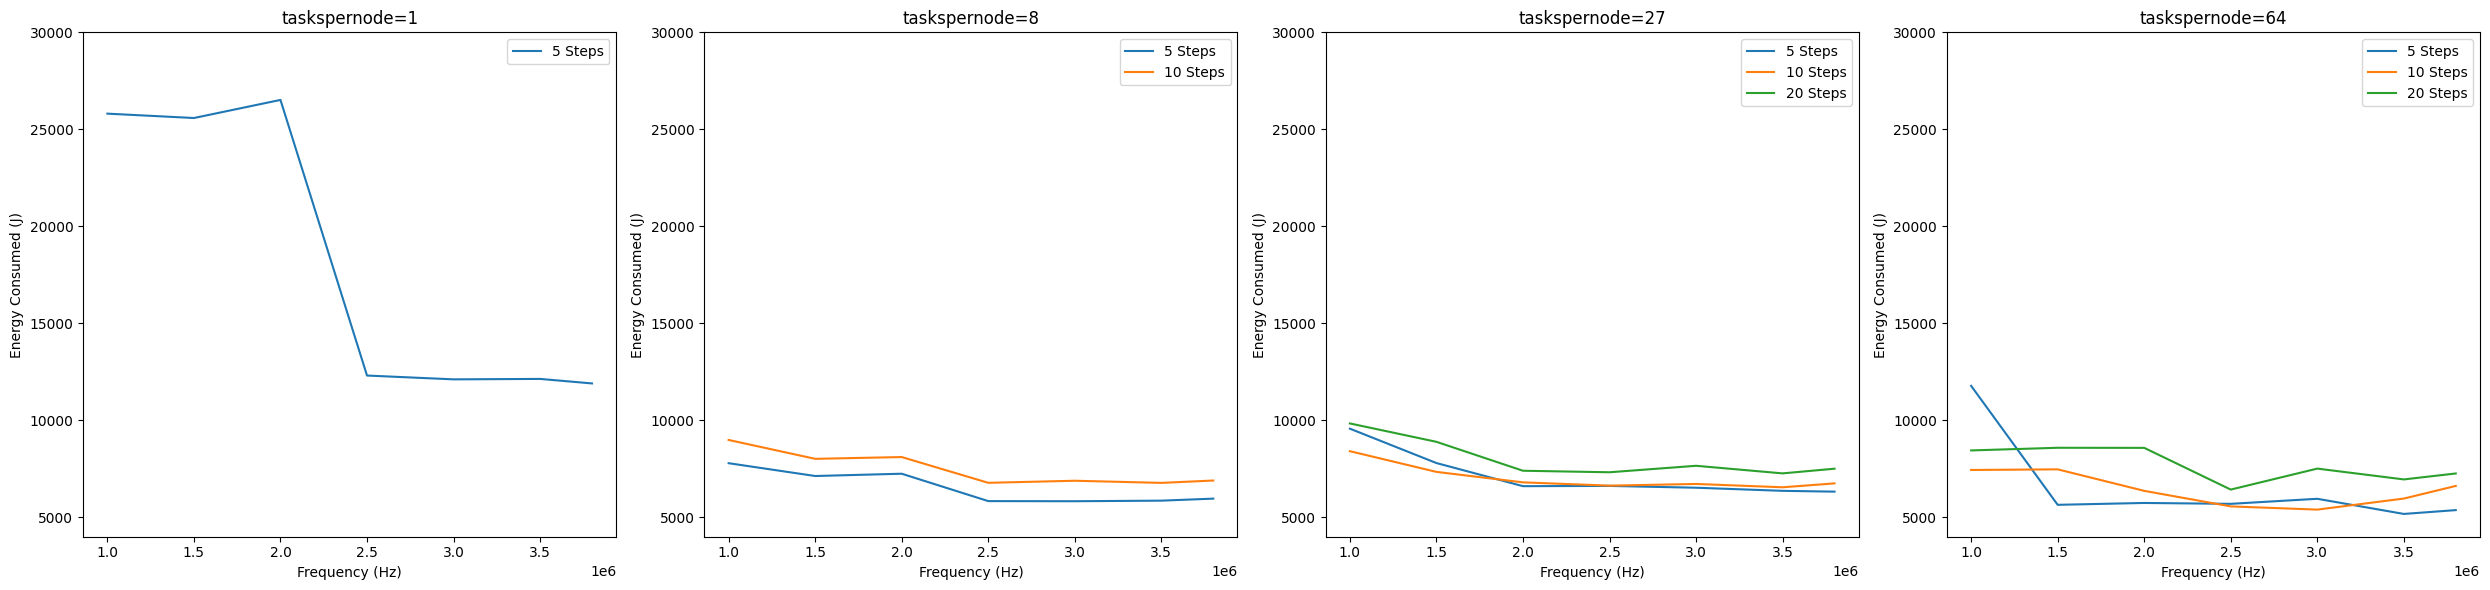

In [11]:
fig, axs = plt.subplots(1, 4, figsize=(25, 6))
first_step_energy = None

for i, task in enumerate(df_without_overflow["taskspernode"].unique()):
    for j, step in enumerate(df["s"].unique()):
        subset_df = df_without_overflow[(df_without_overflow["taskspernode"] == task) & (df_without_overflow["s"] == step)]

        total_energy_list = []
        for freq in subset_df["cpufreq"].unique():
            single_run_df = pd.read_csv(
                f"../data/lulesh_reports/{task}_ranks_{96 // task}_threads_{freq}_hz_{step}_steps.csv",
                delimiter=",",
                encoding="utf-8",
                header=0
            )

            total_energy_list.append(single_run_df["total_energy"].max())

        if step == 1:
            first_step_energy = total_energy_list
        else:
            if len(total_energy_list) != len(first_step_energy):
                continue
            total_energy_list = np.array(total_energy_list)
            first_step_energy = np.array(first_step_energy)
            axs[i%4].plot(subset_df['cpufreq'], (total_energy_list - first_step_energy) / (step - 1), label=f"{step} Steps")
            axs[i%4].set_title(f'taskspernode={task}')
            axs[i%4].set_xlabel('Frequency (Hz)')
            axs[i%4].set_ylabel('Energy Consumed (J)')
            axs[i%4].legend()
            axs[i%4].set_ylim([4000, 30000])

plt.tight_layout()

plt.savefig("../results/lulesh_cpufreq_total_energy_compact.png", dpi=300)
plt.show()